## GEO Example

## Table of Contents
- [Introduction](#intro)


In [15]:
##  Imports
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from shapely.geometry import box

In [16]:
## Starting with land use geometry from Open Street Maps 
#https://www.openstreetmap.org/#map=11/53.5195/-113.4475
path = "shapefiles/alberta-latest-free/gis_osm_landuse_a_free_1.shp"
alberta = geopandas.read_file(path)
alberta.head()

,osm_id,code,fclass,name,geometry
0,4637407,7202,park,Nose Hill Park,"POLYGON ((-114.13938 51.10938, -114.13937 51.1..."
1,4721876,7202,park,West Confederation Park,"POLYGON ((-114.11515 51.08155, -114.11496 51.0..."
2,4781379,7202,park,Cochrane Ranche,"POLYGON ((-114.48593 51.19858, -114.48541 51.1..."
3,4781387,7202,park,Mitford Park,"POLYGON ((-114.49651 51.19028, -114.49649 51.1..."
4,4781445,7202,park,W.D. Kerfoot Park,"POLYGON ((-114.47413 51.19595, -114.47371 51.1..."


In [84]:
#Select only some Edmonton data from the Alberta geometry
#d = alberta.geometry[0:].sindex.query(box(-113.42, 53.44, -113.48, 53.48))
d = alberta.geometry[0:].sindex.query(box(-113.394, 53.4365, -113.467, 53.4875))

#d

In [85]:
edm = alberta.geometry[d]

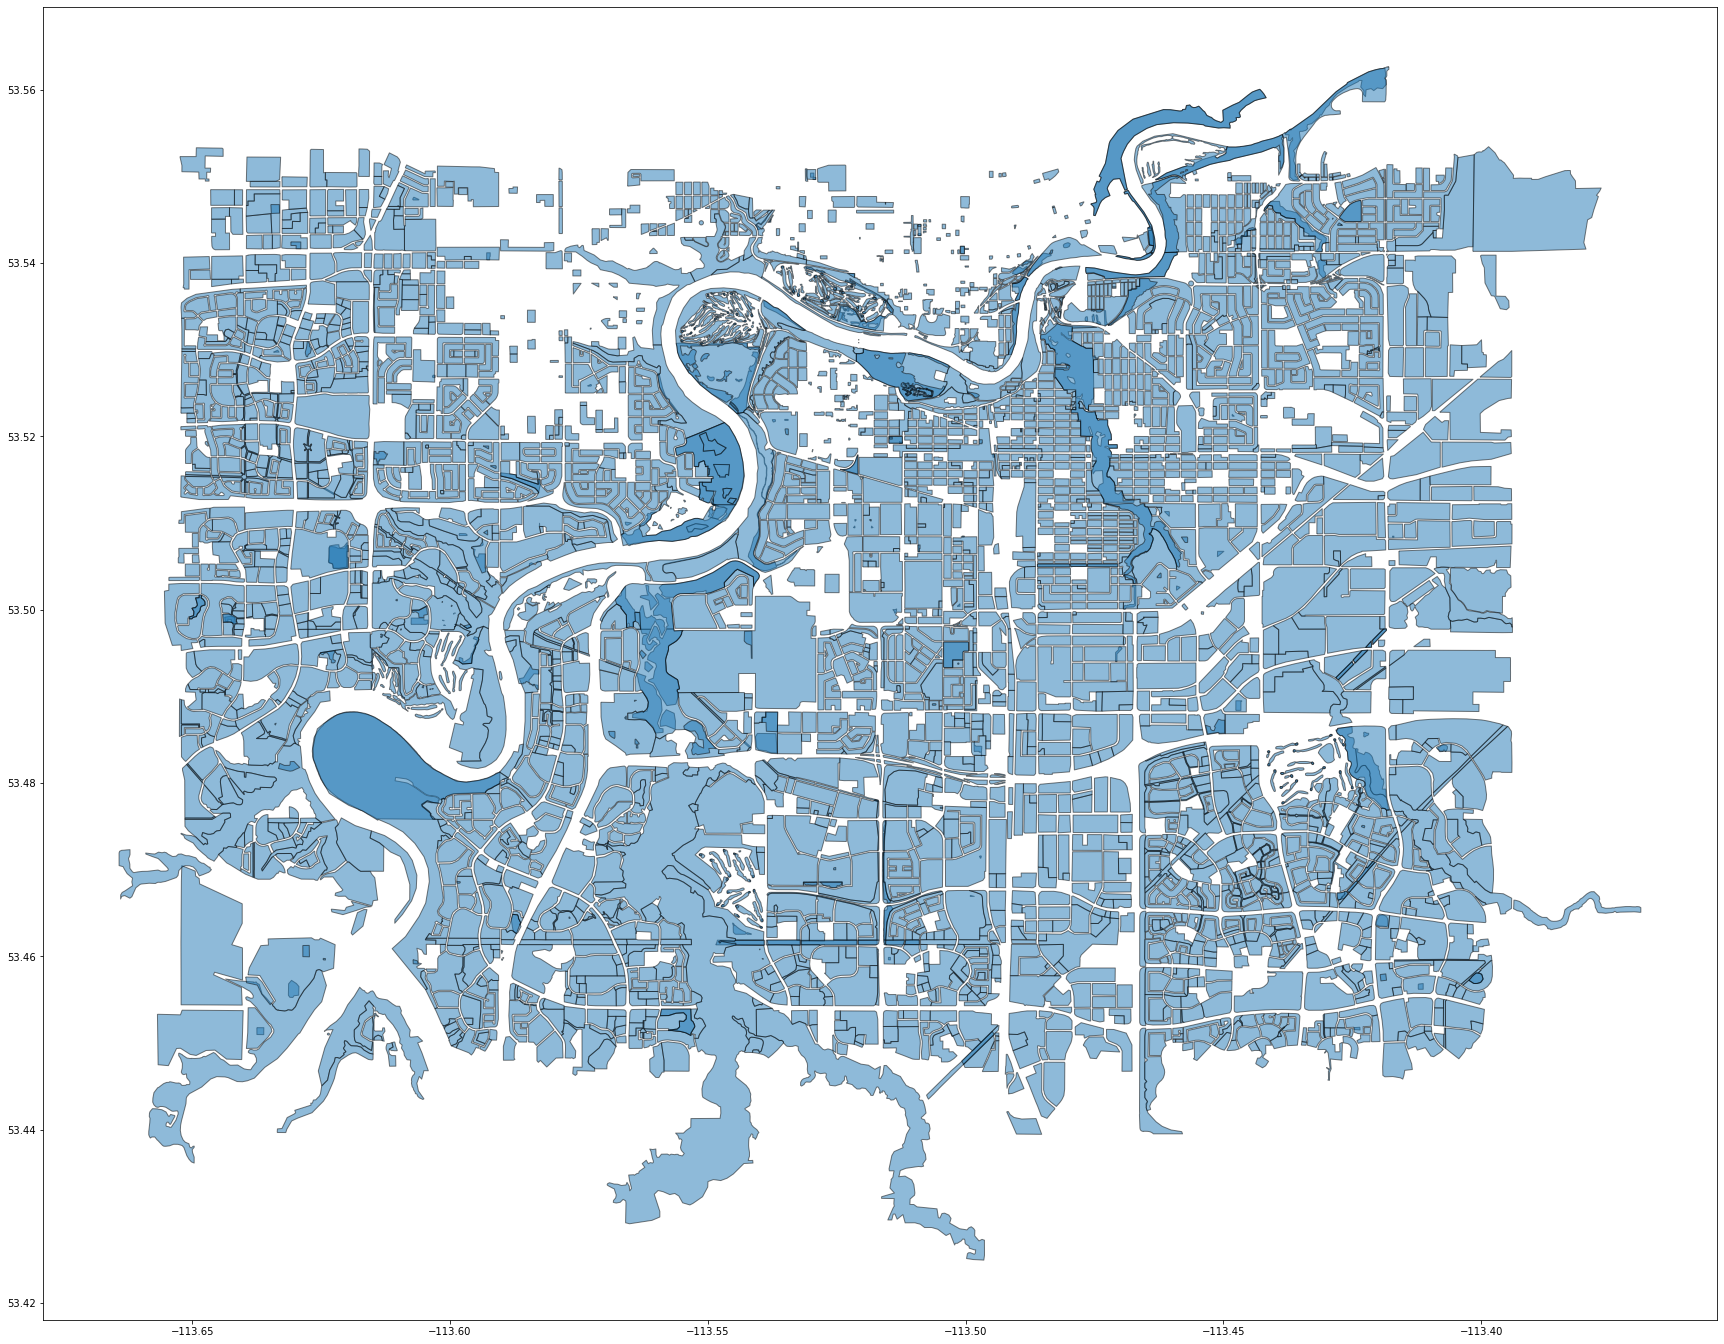

In [5]:
#Plot that Edmonton data
edm.plot(figsize=(30, 30), alpha=0.5, edgecolor='k')

In [19]:
#Get OSM Alberta road shapes
path = "shapefiles/alberta-latest-free/gis_osm_roads_free_1.shp"
ABroads = geopandas.read_file(path)

ABroads.head()

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
0,4365210,5111,motorway,Queen Elizabeth II Highway,2,F,110,0,F,F,"LINESTRING (-114.00123 51.21916, -114.00123 51..."
1,4366363,5113,primary,Township Road 312,27,B,100,0,F,F,"LINESTRING (-113.24103 51.64888, -113.21761 51..."
2,4366364,5114,secondary,Highway 582,582,B,0,0,F,F,"LINESTRING (-114.49769 51.68216, -114.49463 51..."
3,4366365,5132,trunk_link,None,None,F,0,0,F,F,"LINESTRING (-114.02772 51.66393, -114.02754 51..."
4,4366404,5111,motorway,Stoney Trail NW,201,F,100,0,F,F,"LINESTRING (-114.15405 51.15266, -114.15619 51..."


In [76]:
#Get the same region of data from ABroads
d = ABroads.geometry[0:].sindex.query(box(-113.394, 53.4365, -113.467, 53.4875))
edmroads = ABroads.geometry[d]

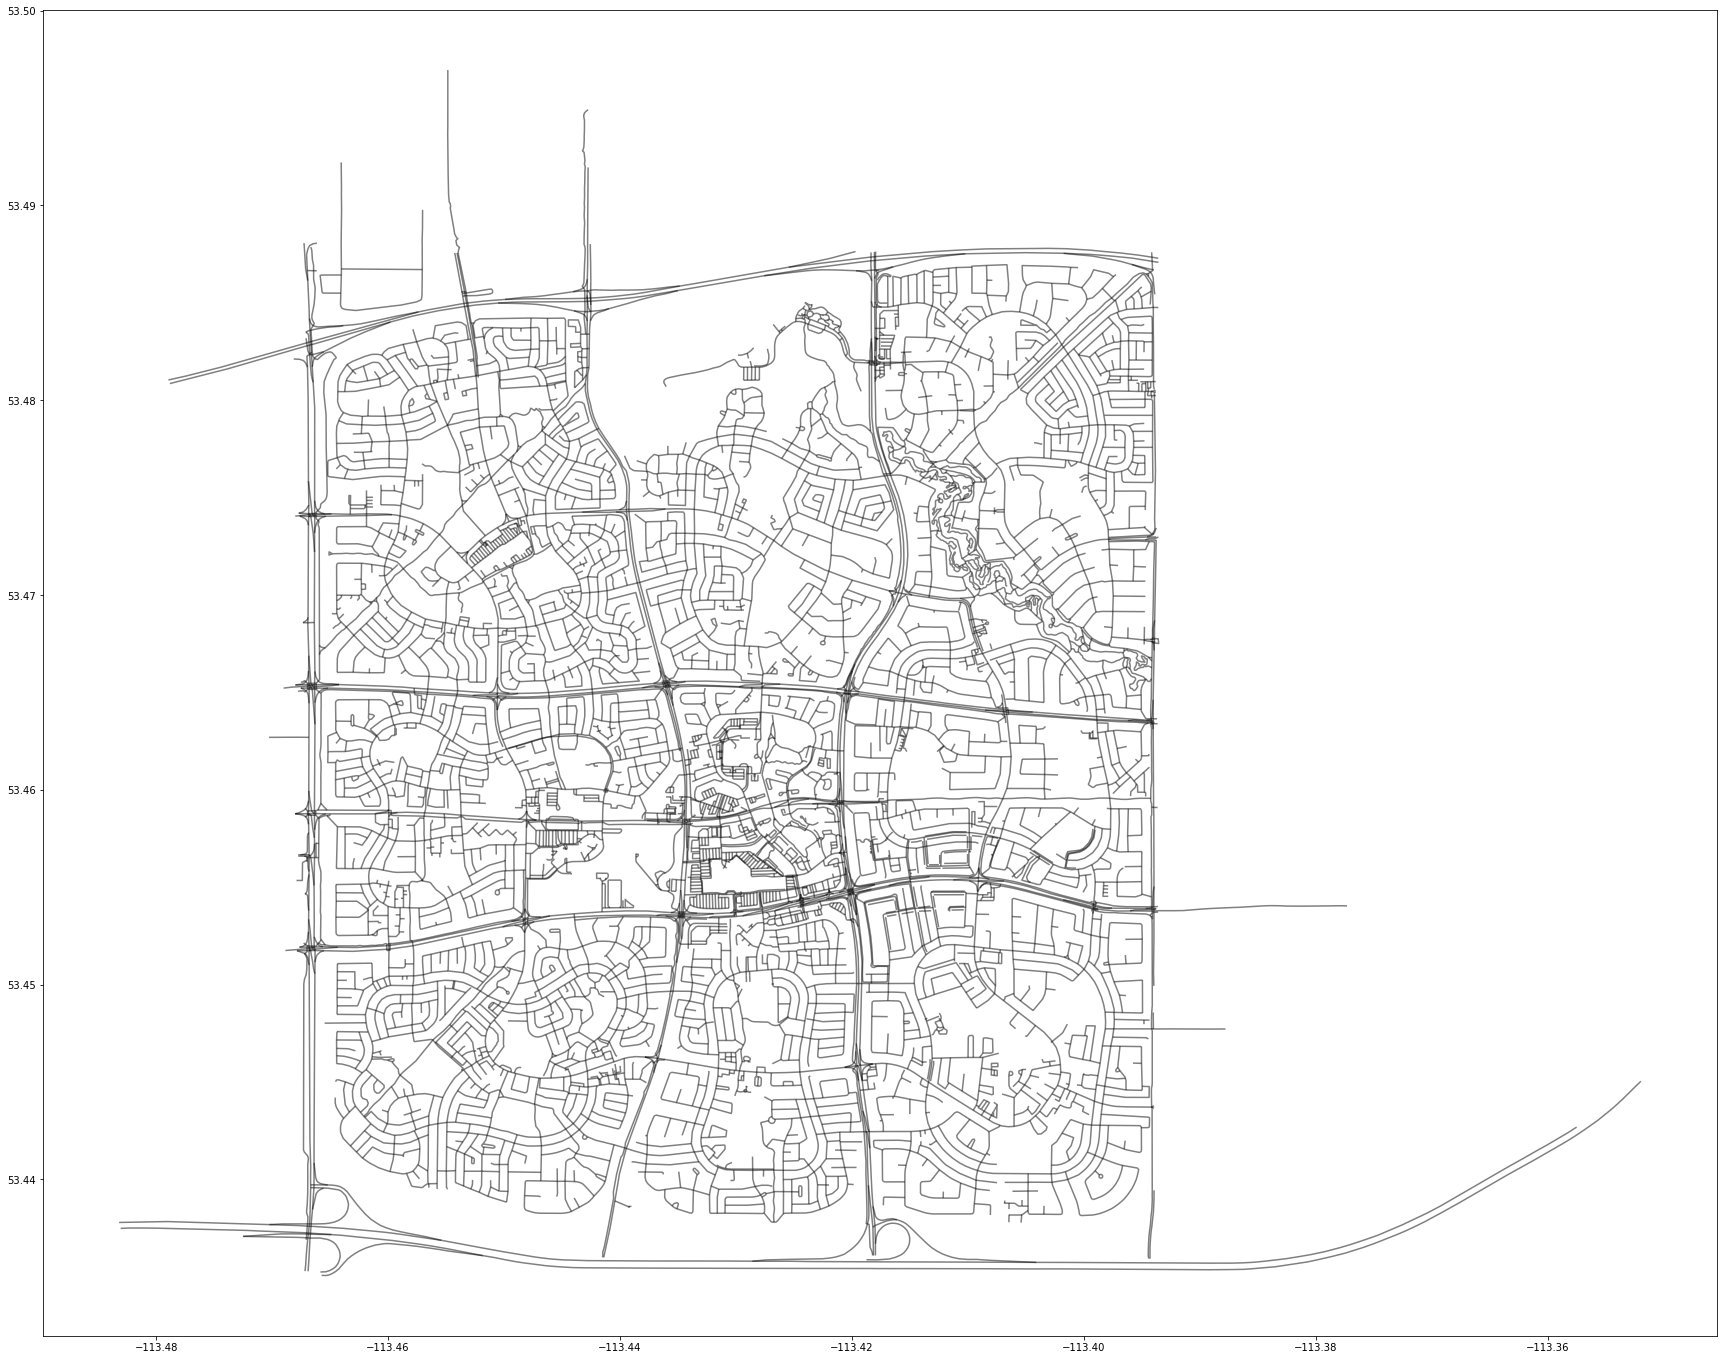

In [77]:
edmroads.plot(figsize=(30, 30), alpha=0.5, color='k')

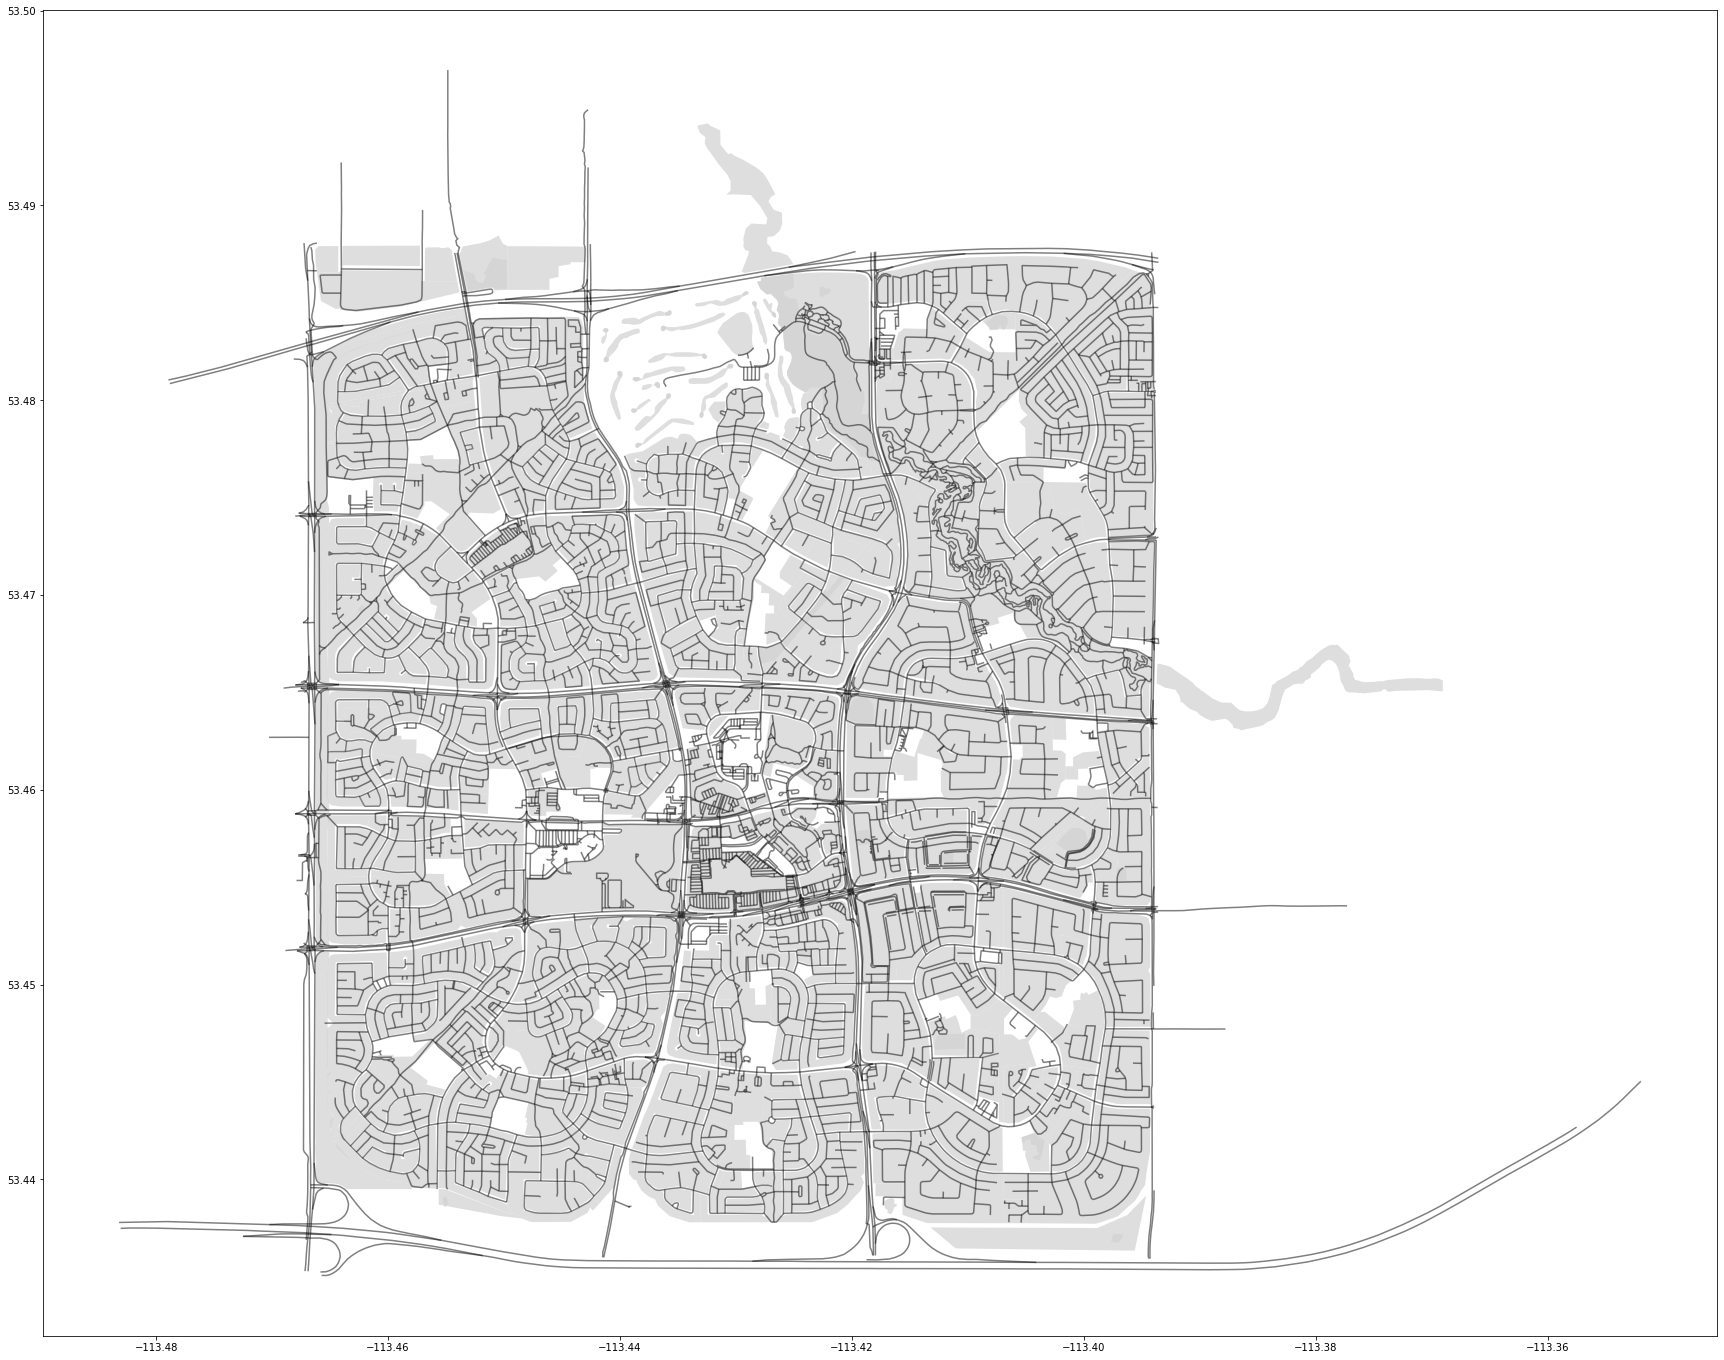

In [88]:
ax= edmroads.plot(figsize=(30, 30), alpha=0.5, color='k')

edm.plot(ax=ax, alpha=0.75, color='lightgrey')

plt.show()